# Contexto

Esse Notebook tem como intuito realizar a análise descritiva das vendas de uma loja fictícia MultiStore. A loja precisa aumentar suas vendas e para isso
disponibilizou uma base de dados para que o analista encontre algumas respostas. Essa é uma base única com muitos dados a serem explorados.

# Bibliotecas
Serão importadas apenas essas bibliotecas, mas caso haja a necessidade mais serão adicionadas durante a desenvoltura do notebook.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Importando a base de dados

In [3]:
df = pd.read_excel(r'C:\Users\Andre\OneDrive\Área de Trabalho\stage_MultiStore.xlsx')


## Limpeza e entendimento da base de dados

### Limpeza

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Age,Customer Birthday,Customer State,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,42682,42685,Second Class,CG-12520,Claire Gute,47,01-26,Active,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,42682,42685,Second Class,CG-12520,Claire Gute,29,06-09,Active,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,42533,42537,Second Class,DV-13045,Darrin Van Huff,20,10-15,Active,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,42288,42295,Standard Class,SO-20335,Sean O'Donnell,57,06-07,Active,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,42288,42295,Standard Class,SO-20335,Sean O'Donnell,65,08-17,Active,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row ID               9994 non-null   int64  
 1   Order ID             9994 non-null   object 
 2   Order Date           9994 non-null   int64  
 3   Ship Date            9994 non-null   int64  
 4   Ship Mode            9994 non-null   object 
 5   Customer ID          9994 non-null   object 
 6   Customer Name        9994 non-null   object 
 7   Customer Age         9994 non-null   int64  
 8   Customer Birthday    9994 non-null   object 
 9   Customer State       9994 non-null   object 
 10  Segment              9994 non-null   object 
 11  Country              9994 non-null   object 
 12  City                 9994 non-null   object 
 13  State                9994 non-null   object 
 14  Regional Manager ID  9994 non-null   object 
 15  Regional Manager     9994 non-null   o

In [56]:
x = df.duplicated().sum()
print(f'Existem {x} dados duplicados na base')

Existem 0 dados duplicados na base


In [57]:
# Entendendo quantas idades cada customer tem...

df_count_age = df.groupby("Customer Name")[['Customer Age','Customer Birthday']].count()
df_count_age_filtered = df_count_age[df_count_age['Customer Age'] <= 1]
df_count_age_filtered

,Customer Age,Customer Birthday
Customer Name,,
Anthony O'Donnell,1,1
Carl Jackson,1,1
Jocasta Rupert,1,1
Lela Donovan,1,1
Ricardo Emerson,1,1


## Primeiras observações...
1. A coluna de idade parece não fazer sentido, assim como a data de nascimento. Apenas seis clientes tem uma idade única cadastrada, o que soa um pouco estranho. Logo para a análise continuar irei dropar essas duas colunas e não será possível entender a faixa de idade dos clientes.
2. Não tem dados nulos na base, assim como não tem dados duplicados e como é uma base dimensão com ID, então não irei dropar a coluna para checar essa informação.

In [8]:
df = df.drop(columns= ["Customer Age", "Customer Birthday"])

### Order Date e Ship Date 
Esses dois campos são representações de datas no formato numérico, então vamos transforma-lá em formato de data

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], origin='1899-12-30', unit='D')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], origin='1899-12-30', unit='D')

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer State,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Active,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Active,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Active,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Active,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Active,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Por não ter conhecimento da base e a base ter apresentado erro de idade, vamos avaliar se os dados cadastrais são correspondentes a localização, segmentos etc...

Para isso vamos selecionar apenas as colunas que fazem referência aos cadastros dos clientes...
1. Customer Name
2. Customer ID
3. Customer State
4. Segment
5. Country
6. City
7. State
8. Postal Code
9. Region        

In [22]:
columns_to_check = ['Customer Name', 'Customer ID', 'Customer State', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region']

unique_values = df.groupby('Customer ID').agg({
    'Customer Name': pd.Series.nunique,
    'Customer State': pd.Series.nunique,
    'Segment': pd.Series.nunique,
    'Country': pd.Series.nunique,
    'City': pd.Series.nunique,
    'State': pd.Series.nunique,
    'Postal Code': pd.Series.nunique,
    'Region': pd.Series.nunique
})

unique_values


,Customer Name,Customer State,Segment,Country,City,State,Postal Code,Region
Customer ID,,,,,,,,
AA-10315,1,1,1,1,4,4,5,3
AA-10375,1,1,1,1,9,8,9,4
AA-10480,1,1,1,1,4,4,4,3
AA-10645,1,1,1,1,6,5,6,4
AB-10015,1,1,1,1,3,3,3,2
...,...,...,...,...,...,...,...,...
XP-21865,1,1,1,1,10,8,11,4
YC-21895,1,1,1,1,5,4,5,3
YS-21880,1,1,1,1,8,6,8,3


In [25]:
unique_counts = unique_values.nunique()

# Separando colunas com apenas um dado e mais de um dado
single_value_columns = unique_counts[unique_counts == 1].index
multiple_values_columns = unique_counts[unique_counts > 1].index

print("Colunas com apenas um tipo de cadastro:")
print(single_value_columns)

print("\nColunas com mais de um tipo de cadastro:")
print(multiple_values_columns)

Colunas com apenas um tipo de cadastro:
Index(['Customer Name', 'Customer State', 'Segment', 'Country'], dtype='object')

Colunas com mais de um tipo de cadastro:
Index(['City', 'State', 'Postal Code', 'Region'], dtype='object')


--------------------------

A informação de que os endereços se referem às lojas e não aos cadastros dos clientes é fundamental. Isso permite analisar o desempenho das lojas em cada localidade, focando nas operações e comportamentos específicos das unidades comerciais em diferentes regiões, em vez de analisar o comportamento individual dos clientes em várias cidades.

### Existem clientes inativos?

In [16]:
state_counts = df['Customer State'].value_counts()
print(state_counts)

Customer State
Active    9994
Name: count, dtype: int64


---------------------

Todos os clientes da base são ativos.

### Qual o método de entrega mais utilizado?

In [17]:
state_counts = df['Ship Mode'].value_counts()
print(state_counts)

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


Com a tabela pronta para usar, algumas perguntas necessitam ser respondidas..

# Perguntas que podem alavancar o negócio:

1. Comportamento de Vendas e Mercado Local: Analisar o comportamento das lojas em cada localidade de maneira que de para identificar padrões de vendas, preferências de produtos, sazonalidades e outras informações relevantes que são específicas para aquele mercado local.

Como não existe um ID de loja especificando se existe uma loja por cidade, vamos considerar que cada cidade possui uma filial. Então, o primeiro ponto vai ser entender quantas lojas temos por estado e quanto cada estado fatura (profit).

In [29]:
profitState = df.groupby('State').agg({
                                      'City': pd.Series.nunique,
                                      'Profit': pd.Series.sum})

In [30]:
profitState

,City,Profit
State,,
Alabama,8,5786.8253
Arizona,13,-3427.9246
Arkansas,9,4008.6871
California,81,76381.3871
Colorado,16,-6527.8579
Connecticut,10,3511.4918
Delaware,3,9977.3748
District of Columbia,1,1059.5893
Florida,36,-3399.3017


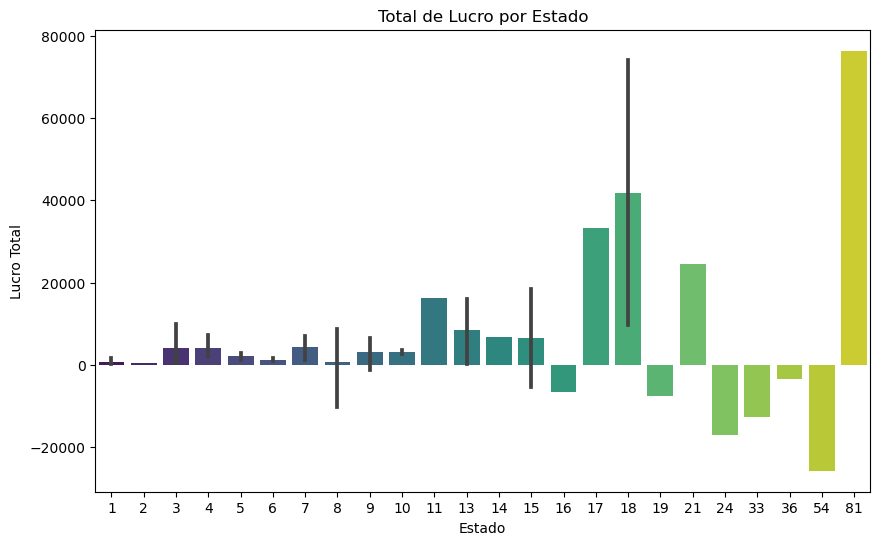

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Profit', data=profitState, palette='viridis')
plt.title('Total de Lucro por Estado')
plt.xlabel('Estado')
plt.ylabel('Lucro Total')
plt.show()